In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Functions

In [54]:
def periodogram(data):
    w = np.linspace(0,np.pi,len(data))
    I = []
    for f in w:
        summ = 0
        for i in range(len(data)):
            summ += data[i]*np.exp(-1j*f*i)
        I.append(abs(summ)**2 / len(data))
    return w/np.pi, I

def mod_periodogram(data, window):
    
    return


# Problems from book

### Example 14.1 Study and Recreate

The Power Spectral Density of a Gaussian distribution with mean $\mu$ and variance $\sigma ^2$ is given by:
$$
S(\omega) = \sigma^2
$$
That is, a constant PSD over frequencies. 

Using the periodogram as an estimator for the PSD of the WGN, it is shown that it is not a good estimator.

Plotted in red is the theoretical PSD of the WGN stationary random process. Plotted in blue is the estimated PSD using the periodogram function (eq. 14.34).

It is shown by plotting different size segments of the samples, that the mean of the periodogram stays close to the variance of the Gaussian distribution but the variance of the periodogram is large and does no decrease with an increase in data points. Hence, it is not a good estimator for the WGN random process.

Quoting the book: It is safe to say that if $I(\omega)$ is not a good estimator for a flat (constant) spectrum, it cannot be expected to be a good estimator for more complitcated spectra. 

This is why the modified periodogram is introduced. 

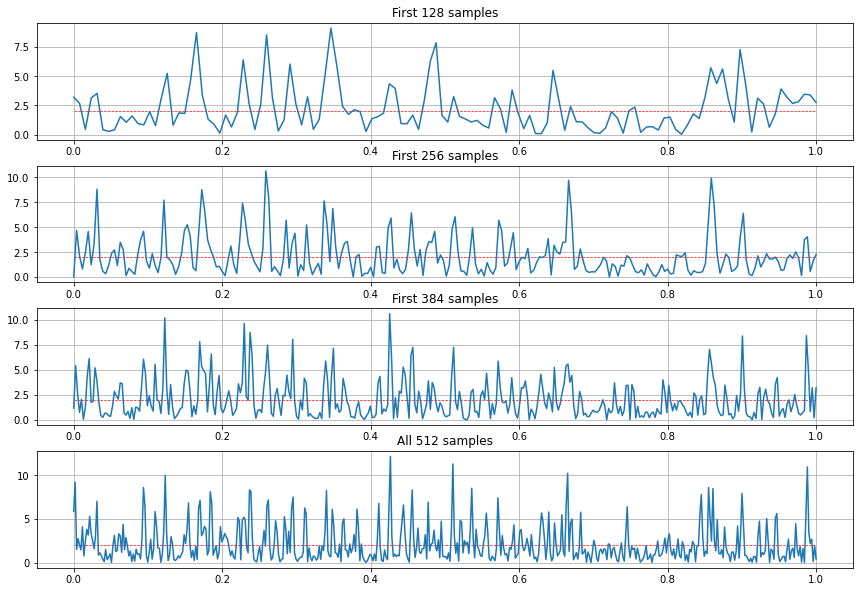

Mean: 2.2285 and variance: 3.8578 over frequency (128 samples)
Mean: 2.1275 and variance: 4.1031 over frequency (256 samples)
Mean: 2.041 and variance: 3.7478 over frequency (384 samples)
Mean: 2.1423 and variance: 4.5751 over frequency (512 samples)


In [90]:
size = 512
mu = 0
var = 2
xn = np.random.normal(loc=0, scale=np.sqrt(var), size=size)
x128 = xn[:128]
x256 = xn[:256]
x384 = xn[:384]
x512 = xn

w128, I128 = periodogram(x128)
w256, I256 = periodogram(x256)
w384, I384 = periodogram(x384)
w512, I512 = periodogram(x512)

m128, v128 = np.mean(I128), np.var(I128)
m256, v256 = np.mean(I256), np.var(I256)
m384, v384 = np.mean(I384), np.var(I384)
m512, v512 = np.mean(I512), np.var(I512)

fig, ax = plt.subplots(4,1,figsize=(12,8))
fig.tight_layout(pad=0.5)
ax[0].plot(w128, I128)
ax[0].hlines(2,0,1,color='red',linestyle='--',linewidth=0.7)
ax[0].grid()
ax[0].set_title("First 128 samples")
ax[1].plot(w256, I256)
ax[1].hlines(2,0,1,color='red',linestyle='--',linewidth=0.7)
ax[1].grid()
ax[1].set_title("First 256 samples")
ax[2].plot(w384, I384)
ax[2].hlines(2,0,1,color='red',linestyle='--',linewidth=0.7)
ax[2].grid()
ax[2].set_title("First 384 samples")
ax[3].plot(w512, I512)
ax[3].hlines(2,0,1,color='red',linestyle='--',linewidth=0.7)
ax[3].grid()
ax[3].set_title("All 512 samples")
plt.show()

print("Mean: {m} and variance: {v} over frequency (128 samples)".format(m=m128.round(4), v=v128.round(4)))
print("Mean: {m} and variance: {v} over frequency (256 samples)".format(m=m256.round(4), v=v256.round(4)))
print("Mean: {m} and variance: {v} over frequency (384 samples)".format(m=m384.round(4), v=v384.round(4)))
print("Mean: {m} and variance: {v} over frequency (512 samples)".format(m=m512.round(4), v=v512.round(4)))

### Example 14.2 Study and Recreate

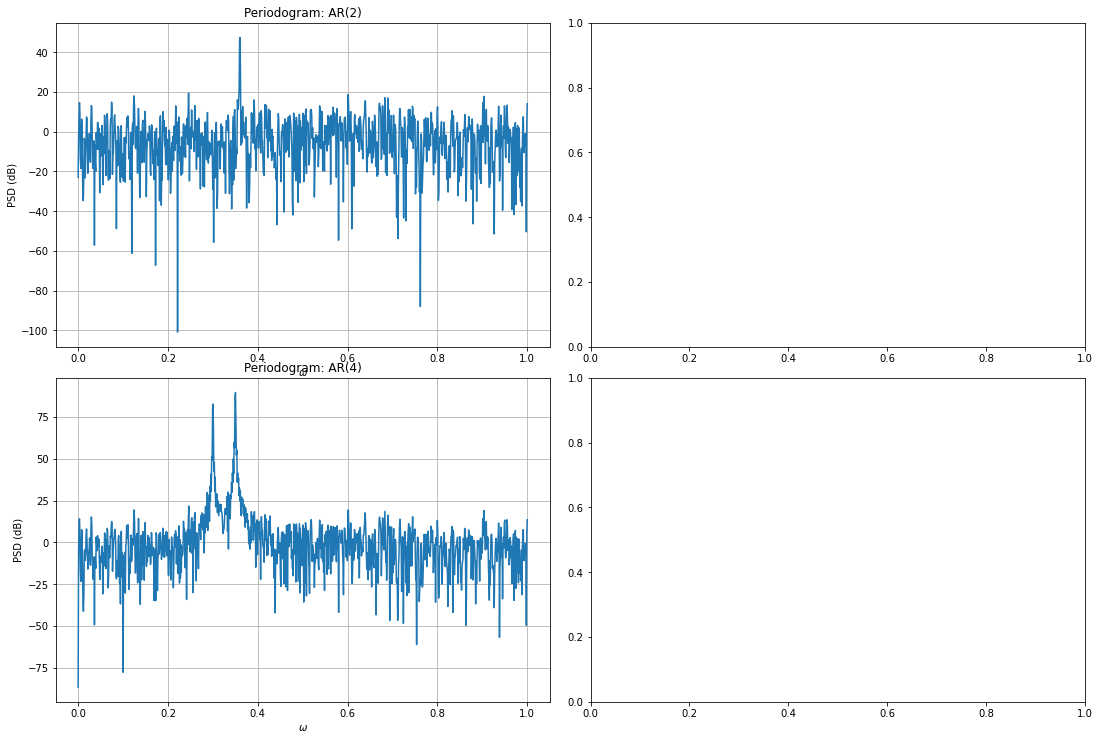

In [89]:
size = 1024
wgn = np.random.normal(size=size)
n = np.arange(0,1024)

xu1 = np.sin(0.36*np.pi*n)
x1 = np.array([0.75*xu1[i+1] - 0.5*xu1[i+2] + wgn[i] for i in range(len(n) - 2)])

xu2 = 4*np.sin(0.3*np.pi*n) + 5*np.sin(0.35*np.pi*n)
x2 = np.array([2.7607*xu2[i+1] - 3.8106*xu2[i+2] + 2.6535*xu2[i+3] - 0.9238*xu2[i+4] + wgn[i] for i in range(len(n) - 4)])

w1, I1 = periodogram(x1)
I1 = 10*np.log(I1)

w2, I2 = periodogram(x2)
I2 = 10*np.log(I2)

fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.tight_layout(pad=1)
ax[0,0].plot(w1,I1)
ax[0,0].set_xlabel("$\omega$")
ax[0,0].set_ylabel("PSD (dB)")
ax[0,0].set_title("Periodogram: AR(2)")
ax[0,0].grid()
ax[1,0].plot(w2,I2)
ax[1,0].set_xlabel("$\omega$")
ax[1,0].set_ylabel("PSD (dB)")
ax[1,0].set_title("Periodogram: AR(4)")
ax[1,0].grid()

### Problem 14.42

There is a typo - It has to be: $cos(0.46\pi n+\phi_2)$

### Problem 14.57

# Problems from Minimum Variance Problems PDF

### Problem 1

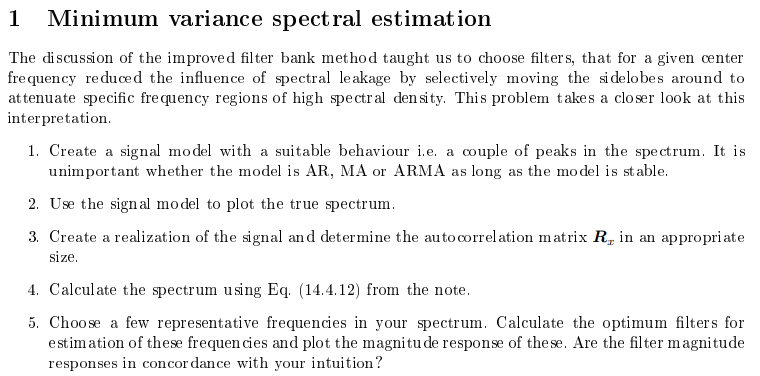

### Problem 2

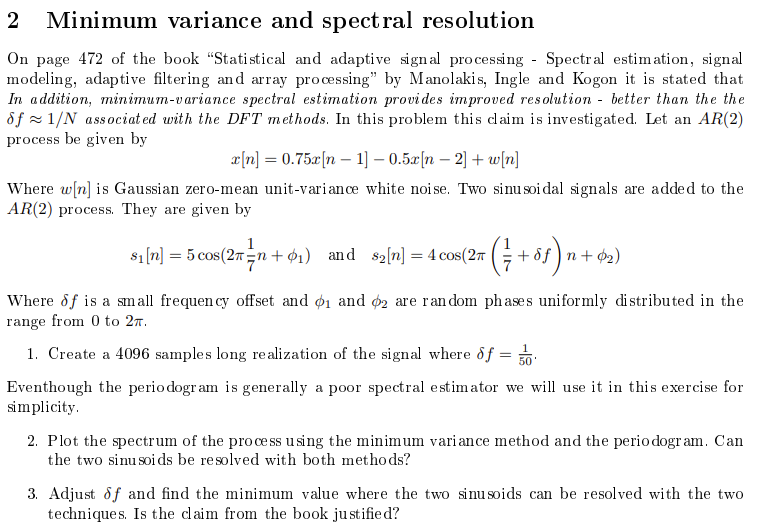